In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import warnings

In [23]:
my_data = pd.read_csv(r"F:\databases\pulsar_stars.csv")
names = ['Mean_of_the_integrated_profile', 'Standard_deviation_of_the_integrated_profile', 'Excess_kurtosis_of_the_integrated_profile', 'Skewness_of_the_integrated_profile', 'Mean_of_the_DM-SNR_curve', 'Standard_deviation_of_the_DM-SNR_curve', 'Excess_kurtosis_of_the_DM-SNR_curve', 'Skewness_of_the_DM-SNR_curve', 'target_class']
#data = pd.read_csv(my_data, names=names)

In [24]:
X = my_data.drop('target_class',1)

In [25]:
print("Actual Features before standardizing\n\n",X.head())

Actual Features before standardizing

     Mean_of_the_integrated_profile  \
0                       140.562500   
1                       102.507812   
2                       103.015625   
3                       136.750000   
4                        88.726562   

    Standard_deviation_of_the_integrated_profile  \
0                                      55.683782   
1                                      58.882430   
2                                      39.341649   
3                                      57.178449   
4                                      40.672225   

    Excess_kurtosis_of_the_integrated_profile  \
0                                   -0.234571   
1                                    0.465318   
2                                    0.323328   
3                                   -0.068415   
4                                    0.600866   

    Skewness_of_the_integrated_profile   Mean_of_the_DM-SNR_curve  \
0                            -0.699648                 

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X,target,test_size=0.3,random_state=0)

In [27]:
y = my_data['target_class']

In [30]:
# Standardizing the features
X_trans = StandardScaler().fit_transform(X)

print("\n")
print("After standardizing the features\n\n",X_trans)
print("\n")



After standardizing the features

 [[ 1.1493  1.3348 -0.6696 ... -0.3706 -0.0728 -0.2874]
 [-0.3342  1.8023 -0.0118 ... -0.5889  0.5044  0.2116]
 [-0.3144 -1.0533 -0.1452 ... -0.2353 -0.126  -0.3914]
 ...
 [ 0.3218  1.9562 -0.2993 ...  1.6716 -1.2881 -0.9413]
 [ 0.1336  1.0745 -0.2601 ... -0.6649  0.3783  0.2758]
 [-2.1058  5.7355  0.8727 ...  1.9715 -2.1973 -0.9711]]




In [43]:
#covariance matrix
covar_matrix = LDA(n_components = 1)

covar_matrix.fit(X_trans,y)

variance = covar_matrix.explained_variance_ratio_

In [38]:
#Cumulative sum of variance
var=np.cumsum(np.round(variance, decimals=3)*100)
print("Eigen values\n\n",var)

Eigen values

 [100.]


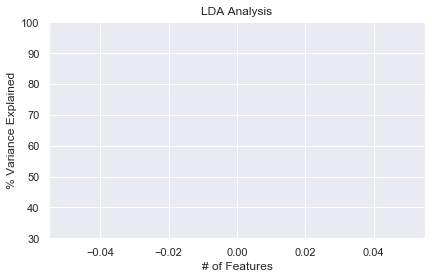

In [39]:
#plot for variance explained
plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('LDA Analysis')
plt.ylim(30,100.5)
plt.style.context('seaborn-whitegrid')
plt.plot(var)
plt.show()

In [40]:
#Fit LDA for two components
lda = LDA(n_components = 1)
LinearComponents = lda.fit_transform(X_trans, y)

In [44]:
#make it as data frame
finalDf = pd.DataFrame(data = LinearComponents, columns = ['linear discriminant'])

print("After transform X, the linear discriminants are\n\n",finalDf.head())
print("\n")

After transform X, the linear discriminants are

    linear discriminant
0            -1.241411
1            -0.170368
2            -0.501111
3            -0.790450
4            -0.225713




2D LDA Visualization



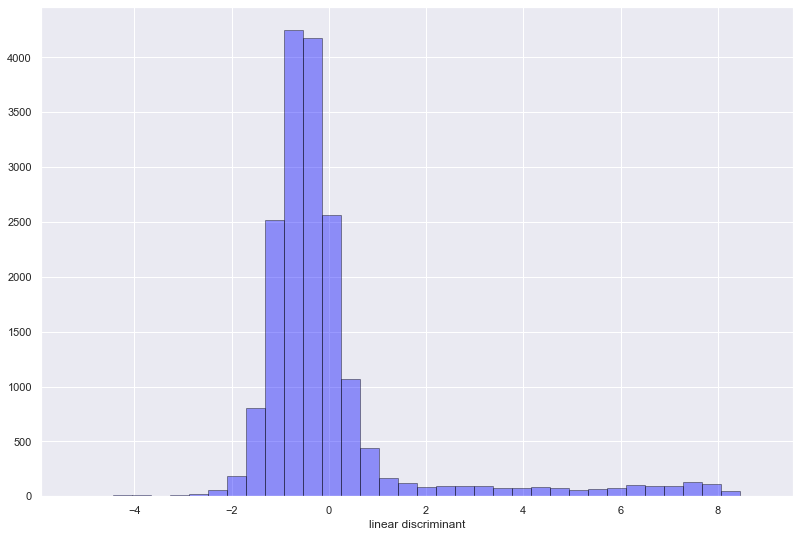

In [53]:
#data visualizations
print("2D LDA Visualization\n")

#def visual(df):
#np.random.seed(1)
#sample_size = 9
#df = df.sample(sample_size)
#plt.figure(figsize=(12,9))
#sns.distplot(finalDf['linear discriminant'], hist = True, kde = False, kde_kws = {'linewidth': 3})
#plt.show()
#visual(finalDf)
#print("\n")

def visual1(df):
    np.random.seed(1)
sample_size = 9
plt.figure(figsize=(12,9))
sns.distplot(finalDf['linear discriminant'], hist = True, kde=False, bins=int(180/5), color = 'blue', hist_kws={'edgecolor':'black'})
plt.show()

visual1(finalDf)
print("\n")

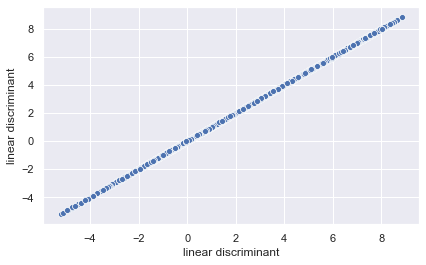



The explained variance percentage is: [100.]


In [59]:
#scatter plot
ax = sns.scatterplot(x="linear discriminant", y="linear discriminant", data=finalDf)
plt.show()
print("\n")

print("The explained variance percentage is:",lda.explained_variance_ratio_*100)